In [1]:
import gymnasium as gym

In [2]:
env = gym.make("CarRacing-v2", continuous=True, render_mode='human', domain_randomize=True)

In [3]:
env.observation_space.shape

(96, 96, 3)

In [4]:
env.action_space

Box([-1.  0.  0.], 1.0, (3,), float32)

In [5]:
env.action_space.sample()

array([0.9741879, 0.6096796, 0.5090065], dtype=float32)

In [6]:
done  = True
score = 0
for step in range(10):
    if done:
        # Start the game to begin with
        env.reset()
# Do random actions
    print("Step ",step)
    state, reward, done, truncated, info = env.step(env.action_space.sample())
    score=score+reward
    print(score)
    print(reward, done,_ ,info )
    env.render()
# Close env
env.close()

2025-04-02 15:36:28.943 python[26040:5107475] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-02 15:36:28.943 python[26040:5107475] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Step  0
5.870149253731344
5.870149253731344 False [0.9741879 0.6096796 0.5090065] {}
Step  1
5.770149253731344
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  2
5.670149253731345
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  3
5.570149253731345
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  4
5.470149253731345
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  5
5.370149253731346
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  6
5.270149253731346
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  7
5.1701492537313465
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  8
5.070149253731347
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}
Step  9
4.970149253731347
-0.09999999999999964 False [0.9741879 0.6096796 0.5090065] {}


In [7]:
# env.close()
state = env.reset()

error: video system not initialized

In [ ]:
print(state[0].shape)

In [ ]:
x = env.step(env.action_space.sample())

In [ ]:
len(env.step([1,1,1]))

In [ ]:
# 0 state
# 1 reward
# 2 done
# 3 truncated
# 4 info
env.step([1,1,1])[1]

# Preprocessing

In [1]:
import gymnasium as gym

In [2]:
from gym.wrappers import GrayScaleObservation

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from matplotlib import pyplot as plt

In [5]:
# Create the environment
env = gym.make("CarRacing-v2", continuous=True, render_mode='human', domain_randomize=True)

# Apply the grayscale wrapper once (keep_dim=True keeps the 3D shape)
# env = GrayScaleObservation(env, keep_dim=True)

# Wrap the environment in a dummy environment for vectorized processing
env = DummyVecEnv([lambda: env])

# Stack our Frame

env = VecFrameStack(env, 4, channels_order='last')

In [6]:
state = env.reset()

2025-04-02 15:37:46.122 python[26637:5110532] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-02 15:37:46.122 python[26637:5110532] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [8]:
state.shape

(1, 96, 96, 12)

In [ ]:
for i in range(1000):
    state, reward, done, info = env.step([env.action_space.sample()])


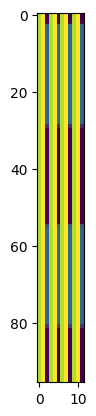

: 

In [ ]:
plt.imshow(state[0])

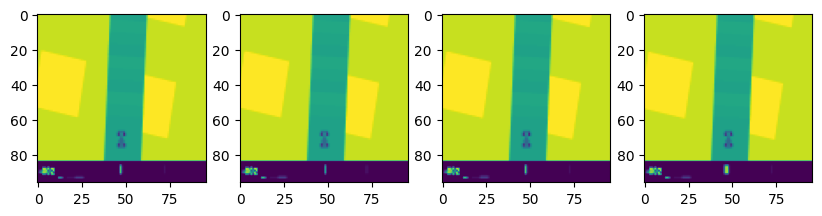

In [ ]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# Train the RL Model

In [82]:
# Import os for file path management
import os
# import PPO
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [89]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose: int = 1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
    
    def _init_callback(self) -> None:
        if self.save_path is not None:
            os.makedirs(self.save_path,exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [90]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [91]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [92]:
# This is the AI started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR,
            learning_rate=0.0001, n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [93]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_2
----------------------------
| time/              |     |
|    fps             | 183 |
|    iterations      | 1   |
|    time_elapsed    | 2   |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 94          |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.008588588 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.25       |
|    explained_variance   | 0.0156      |
|    learning_rate        | 0.0001      |
|    loss                 | 0.235       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0124     |
|    std                  | 0.998       |
|    value_loss           | 0.79        |
-----------------

KeyboardInterrupt: 

In [5]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack

# Create the environment
env = gym.make("CarRacing-v2", render_mode='human')

# Apply the grayscale wrapper (if you want grayscale observations)
env = GrayScaleObservation(env, keep_dim=True)

# Wrap the environment in a DummyVecEnv for parallel processing
env = DummyVecEnv([lambda: env])

# Stack frames for temporal context (using VecFrameStack)
env = VecFrameStack(env, 4, channels_order='last')

# Load the trained PPO model (make sure to change this to your model path)
model = PPO.load('/Users/divyansh/Downloads/best_model_1250000.zip')

# Set the model to evaluation mode (optional, to prevent training updates)
model.set_env(env)

done = True
score = 0

while True:
    if done:
        # Reset the environment to start a new episode
        obs = env.reset()  # `_` is for additional info returned during reset

    # Predict the action using the PPO model
    action = model.predict(obs)
    # Take a step in the environment using the action
    obs, reward, done, info = env.step(action[0])

    # Update the score
    score += reward
    # print(f"Step {step}: Score {score}, Reward {reward}, Done {done}")
    
    # Render the environment (uncomment if you want to visualize the game)
    env.render()

# Close the environment after the loop ends
env.close()


Wrapping the env in a VecTransposeImage.


KeyboardInterrupt: 

In [2]:
env.close()

In [4]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack

# Create the environment
env = gym.make("CarRacing-v2", render_mode='human')

# Apply the grayscale wrapper (if you want grayscale observations)
env = GrayScaleObservation(env, keep_dim=True)

# Wrap the environment in a DummyVecEnv for parallel processing
env = DummyVecEnv([lambda: env])

# Stack frames for temporal context (using VecFrameStack)
env = VecFrameStack(env, 4, channels_order='last')

# Load the trained PPO model (make sure to change this to your model path)
model = PPO.load('/Users/divyansh/Downloads/best_model_1250000 (2).zip')

# Set the model to evaluation mode (optional, to prevent training updates)
model.set_env(env)

done = True
score = 0

try:
    while True:
        if done:
            # Reset the environment to start a new episode
            obs = env.reset()  # Unpack the observation and info

        # Predict the action using the PPO model
        action = model.predict(obs)

        # Take a step in the environment using the action
        obs, reward, done, info = env.step(action[0])

        # Update the score
        score += reward

        # Render the environment (uncomment if you want to visualize the game)
        env.render()

except KeyboardInterrupt:
    print("Game interrupted. Closing environment.")

finally:
    # Close the environment after the loop ends to prevent rendering issues
    env.close()
    print("Environment closed.")


Wrapping the env in a VecTransposeImage.
Game interrupted. Closing environment.
Environment closed.


In [1]:
import sys
import numpy as np
from tensorflow.keras.models import load_model

try:
    import gymnasium as gym
except ModuleNotFoundError:
    print('gymnasium module not found. Try to install with')
    print('pip install gymnasium[box2d]')
    sys.exit(1)

import pygame  # Import pygame for manual cleanup

def play(env, model):
    seed = 2000
    obs, _ = env.reset(seed=seed)

    # Drop initial frames
    action0 = 0
    for _ in range(50):
        obs, _, _, _, _ = env.step(action0)

    done = False

    while not done:
        # Reshape the observation to fit the model input
        p = model.predict(obs.reshape(1, 96, 96, 3))  # adapt to your model
        print(p)
        action = np.argmax(p)  # adapt to your model
        print(f"Predicted action: {action}")

        # Take a step in the environment with the predicted action
        obs, _, terminated, truncated, _ = env.step(action)

        # Check if the episode is done
        done = terminated or truncated

        # Render the environment in human mode
        env.render()

    # Close the environment after the game ends
    env.close()
    pygame.quit()  # Manually terminate pygame and close the window
    print("Environment closed.")

# Set up the environment
env_arguments = {
    'domain_randomize': False,
    'continuous': False,
    'render_mode': "human"  # Set render_mode to human for interactive play
}

env_name = 'CarRacing-v2'
env = gym.make(env_name, **env_arguments)

print("Environment:", env_name)
print("Action space:", env.action_space)
print("Observation space:", env.observation_space)

# Load your trained model
model = load_model('/Applications/Files/SEM_7/MAJOR/demo/GymCarCNNClassifier/models/model1_20_epochs_1e-2.h5')

# Play the game
try:
    play(env, model)
except KeyboardInterrupt:
    print("Game interrupted. Closing environment.")
    env.close()
    pygame.quit()  # Ensure pygame is properly terminated in case of interruption


Environment: CarRacing-v2
Action space: Discrete(5)
Observation space: Box(0, 255, (96, 96, 3), uint8)


2025-05-16 03:48:11.792 python[67491:544979] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-16 03:48:11.792 python[67491:544979] +[IMKInputSession subclass]: chose IMKInputSession_Modern


1/1 [==============================] - 0s 82ms/step
[[0.09681436 0.1868598  0.01760586 0.6285903  0.07012961]]
Predicted action: 3
1/1 [==============================] - 0s 17ms/step
[[0.09676345 0.18683939 0.0175874  0.62862587 0.0701839 ]]
Predicted action: 3
1/1 [==============================] - 0s 15ms/step
[[0.09676615 0.18680198 0.01758101 0.62860686 0.07024404]]
Predicted action: 3
1/1 [==============================] - 0s 15ms/step
[[0.09670386 0.18678872 0.01755411 0.6286112  0.07034212]]
Predicted action: 3
1/1 [==============================] - 0s 15ms/step
[[0.09670651 0.18677299 0.01754793 0.6285725  0.0704    ]]
Predicted action: 3
1/1 [==============================] - 0s 55ms/step
[[0.09662612 0.18680474 0.01750104 0.62859046 0.07047772]]
Predicted action: 3
1/1 [==============================] - 0s 15ms/step
[[0.09651805 0.18680982 0.01743484 0.62862843 0.07060882]]
Predicted action: 3
1/1 [==============================] - 0s 15ms/step
[[0.09648205 0.18674318 0.01741